# Overview

**If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.Identification of such applicants using EDA is the aim of this case study.**
1. Data understanding
2. Dat  cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis
4. Recommendationstion.

__Data Understanding__

In [1]:
# basic library import section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading required dataset
loan = pd.read_csv('loan_csv.csv')


In [3]:
loan.shape

(39717, 111)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
loan.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [8]:
loan.select_dtypes(include=['object']).nunique()

term                       2
int_rate                 371
grade                      7
sub_grade                 35
emp_title              28617
emp_length                11
home_ownership             5
verification_status        3
issue_d                   55
loan_status                3
pymnt_plan                 1
url                    39717
desc                   26518
purpose                   14
title                  19339
zip_code                 823
addr_state                50
earliest_cr_line         526
revol_util              1089
initial_list_status        1
last_pymnt_d             101
next_pymnt_d               2
last_credit_pull_d       106
application_type           1
dtype: int64

In [9]:
loan.select_dtypes(exclude=['object']).nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 87, dtype: int64

In [10]:
missing_percentage = (loan.isnull().sum() / len(loan)) * 100
missing_percentage

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [11]:
loan.drop(columns=missing_percentage[missing_percentage > 67].index, inplace=True)

In [12]:
loan.shape

(39717, 55)

In [13]:
loan.shape

(39717, 55)

In [14]:
# 1️⃣ Remove "Current" loans (since they are neither defaulted nor fully paid).
# 2️⃣ Drop customer behavior variables (since they are generated after loan approval and cannot be used for prediction).
# 3️⃣ Convert loan status into binary (0 or 1) for classification modeling.

In [15]:
#Remove "Current" Loans
loan = loan[loan['loan_status'] != 'Current']

Now, only "Fully Paid" and "Charged Off" (defaulted) loans remain.

In [16]:
#Convert Loan Status to Binary (0 or 1)
loan['loan_status'] = loan['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})


Now, "Fully Paid" is labeled as 0 and "Charged Off" (default) as 1.

In [17]:
# Define keywords related to customer behavior
behavioral_keywords = ['delinq', 'inq', 'util', 'acc', 'pub_rec', 'payment', 'revol']

# Identify behavioral columns
behavioral_cols = [col for col in loan.columns if any(keyword in col.lower() for keyword in behavioral_keywords)]

# Drop them
loan.drop(columns=behavioral_cols, inplace=True)

# Confirm changes
print("Remaining Columns:", loan.columns)

Remaining Columns: Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'chargeoff_within_12_mths', 'tax_liens'],
      dtype='object')


Now, only applicant details and loan characteristics remain!

In [18]:
loan.shape

(38577, 44)

In [19]:
# Define the important variables (replace with actual column names)
important_variables = ['loan_amnt', 'dti', 'term', 'funded_amnt','loan_status','funded_amnt_inv','int_rate','grade','sub_grade','annual_inc','purpose','verification_status','emp_length','pymnt_plan','issue_d','home_ownership'
]  # Add the correct column names

# Select only the important columns
loan_ = loan[important_variables]

# Display the first few rows
print(loan_.head())

# Save the filtered data if needed
loan_.to_csv("filtered_loan_data.csv", index=False)

   loan_amnt    dti       term  funded_amnt  loan_status  funded_amnt_inv  \
0       5000  27.65  36 months         5000            0           4975.0   
1       2500   1.00  60 months         2500            1           2500.0   
2       2400   8.72  36 months         2400            0           2400.0   
3      10000  20.00  36 months        10000            0          10000.0   
5       5000  11.20  36 months         5000            0           5000.0   

  int_rate grade sub_grade  annual_inc         purpose verification_status  \
0   10.65%     B        B2     24000.0     credit_card            Verified   
1   15.27%     C        C4     30000.0             car     Source Verified   
2   15.96%     C        C5     12252.0  small_business        Not Verified   
3   13.49%     C        C1     49200.0           other     Source Verified   
5    7.90%     A        A4     36000.0         wedding     Source Verified   

  emp_length pymnt_plan issue_d home_ownership  
0  10+ years       

In [20]:
print("Mode : " + loan_.emp_length.mode()[0])
loan_.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [21]:
# Fill NaN values with the most frequent value in the emp_length column
loan_.emp_length.fillna(loan_.emp_length.mode()[0], inplace = True)
loan_.emp_length.isna().sum()

0

<Axes: xlabel='annual_inc'>

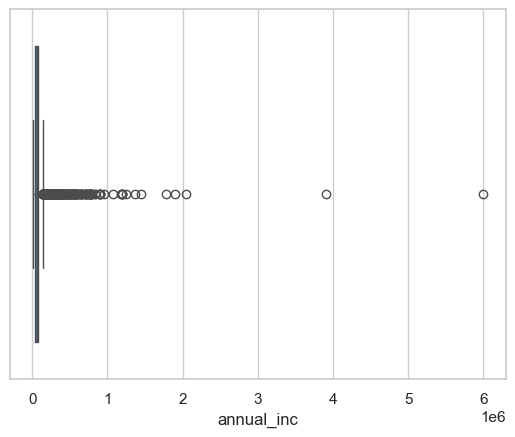

In [22]:
sns.set(style= 'whitegrid')
sns.boxplot(x = 'annual_inc', data = loan_)

**Clearly indicating the presence of outliers.**

So, removing them
Let's see the quantile info and take an appropriate action.
The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
So, considering threshold for removing outliers as 0.95

In [23]:
quantile_info = loan_.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [24]:
per_95_annual_inc = loan_['annual_inc'].quantile(0.95)
loan_ = loan_[loan_.annual_inc <= per_95_annual_inc]

<Axes: ylabel='annual_inc'>

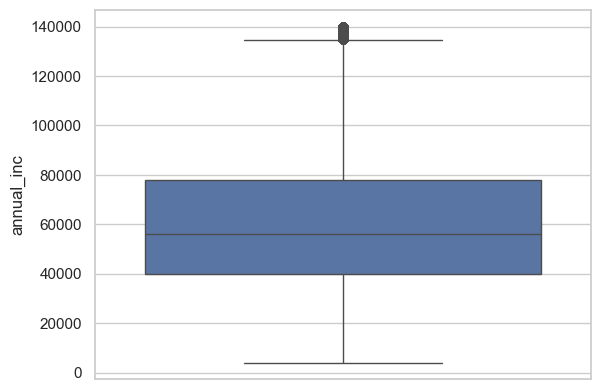

In [25]:
sns.boxplot(loan_.annual_inc)

In [26]:
loan_.columns

Index(['loan_amnt', 'dti', 'term', 'funded_amnt', 'loan_status',
       'funded_amnt_inv', 'int_rate', 'grade', 'sub_grade', 'annual_inc',
       'purpose', 'verification_status', 'emp_length', 'pymnt_plan', 'issue_d',
       'home_ownership'],
      dtype='object')

<Axes: ylabel='loan_amnt'>

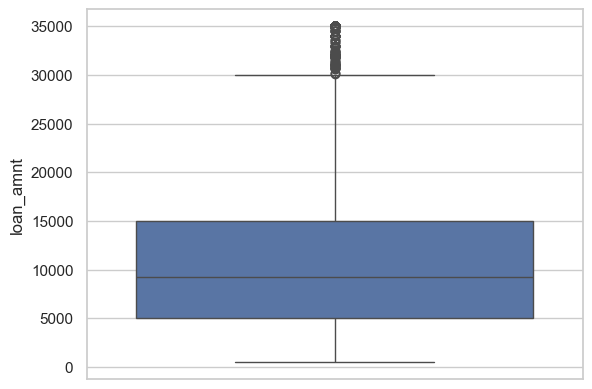

In [27]:
sns.boxplot(loan_.loan_amnt)

In [28]:
loan_.loan_amnt.quantile([0.5, 0.75, 0.9, 0.95, 0.97,0.98, 0.99,1])

0.50     9250.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.97    25475.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

<Axes: ylabel='funded_amnt_inv'>

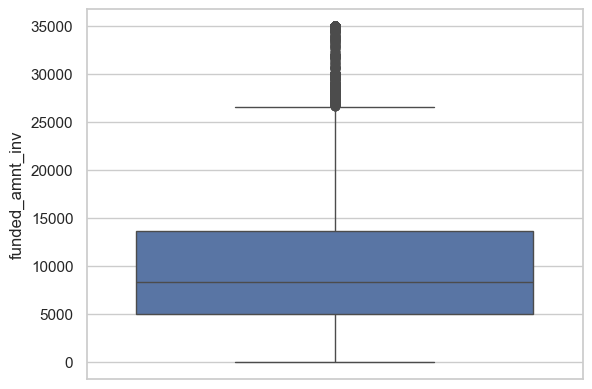

In [29]:
sns.boxplot(loan_.funded_amnt_inv)

In [30]:
loan_.funded_amnt_inv.quantile([0.5,0.75,0.9,0.95,0.97,0.99,1])

0.50     8375.000000
0.75    13623.731415
0.90    19750.000000
0.95    23941.875589
0.97    24975.000000
0.99    31954.028576
1.00    35000.000000
Name: funded_amnt_inv, dtype: float64

Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

**Visualizing Categorical Data**:

As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable

We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

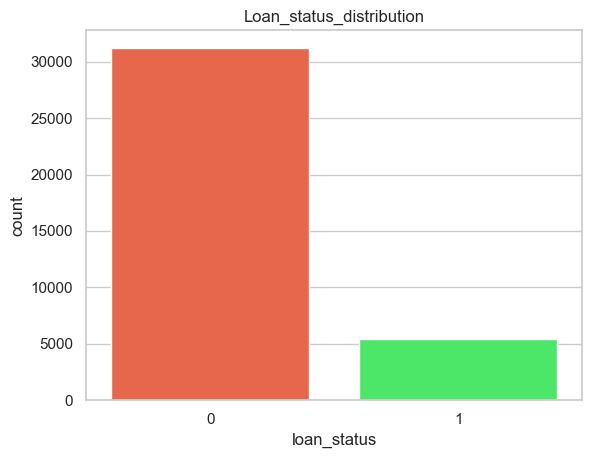

In [31]:
#plt.figure(figsize = (6,4))
sns.countplot(x = 'loan_status',data = loan_, palette = ('#FF5733', '#33FF57'))
#sns.countplot(x = 'loan_status',data = loan_, palette = ('hotpink', 'b'))
plt.title('Loan_status_distribution')
plt.show()

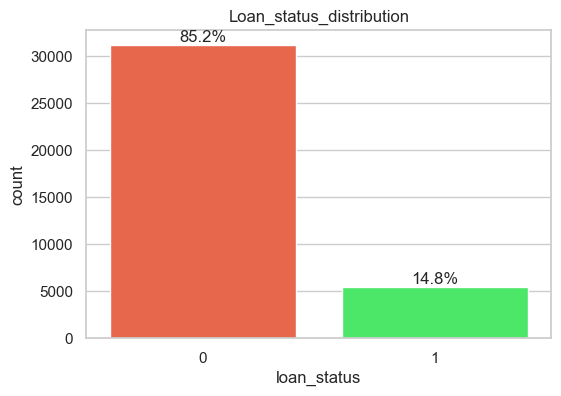

In [32]:
# Set up the figure
plt.figure(figsize=(6, 4))

# Plot the countplot
ax = sns.countplot(x='loan_status', data=loan_, palette=('#FF5733', '#33FF57'))

# Calculate total count for percentages
total = len(loan_)

# Annotate each bar with percentage
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 5, percentage, ha='center', va='bottom')

# Add title and show plot
plt.title('Loan_status_distribution')
plt.show()

In [33]:
loan_['sub_grade']

0        B2
1        C4
2        C5
3        C1
5        A4
         ..
39711    B1
39712    A4
39713    C1
39714    A4
39716    E2
Name: sub_grade, Length: 36654, dtype: object

In [34]:
loan_.sub_grade = pd.to_numeric(loan_.sub_grade.apply(lambda x : x[-1]))
loan_.sub_grade.head()


0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

In [35]:
loan_

,loan_amnt,dti,term,funded_amnt,loan_status,funded_amnt_inv,int_rate,grade,sub_grade,annual_inc,purpose,verification_status,emp_length,pymnt_plan,issue_d,home_ownership
0,5000,27.65,36 months,5000,0,4975.0,10.65%,B,2,24000.0,credit_card,Verified,10+ years,n,Dec-11,RENT
1,2500,1.00,60 months,2500,1,2500.0,15.27%,C,4,30000.0,car,Source Verified,< 1 year,n,Dec-11,RENT
2,2400,8.72,36 months,2400,0,2400.0,15.96%,C,5,12252.0,small_business,Not Verified,10+ years,n,Dec-11,RENT
3,10000,20.00,36 months,10000,0,10000.0,13.49%,C,1,49200.0,other,Source Verified,10+ years,n,Dec-11,RENT
5,5000,11.20,36 months,5000,0,5000.0,7.90%,A,4,36000.0,wedding,Source Verified,3 years,n,Dec-11,RENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,5000,15.55,36 months,5000,0,700.0,8.70%,B,1,75000.0,credit_card,Not Verified,5 years,n,Jul-07,MORTGAGE
39712,2500,11.33,36 months,2500,0,1075.0,8.07%,A,4,110000.0,home_improvement,Not Verified,4 years,n,Jul-07,MORTGAGE
39713,8500,6.40,36 months,8500,0,875.0,10.28%,C,1,18000.0,credit_card,Not Verified,3 years,n,Jul-07,RENT
39714,5000,2.30,36 months,5000,0,1325.0,8.07%,A,4,100000.0,debt_consolidation,Not Verified,< 1 year,n,Jul-07,MORTGAGE


<Axes: xlabel='grade', ylabel='count'>

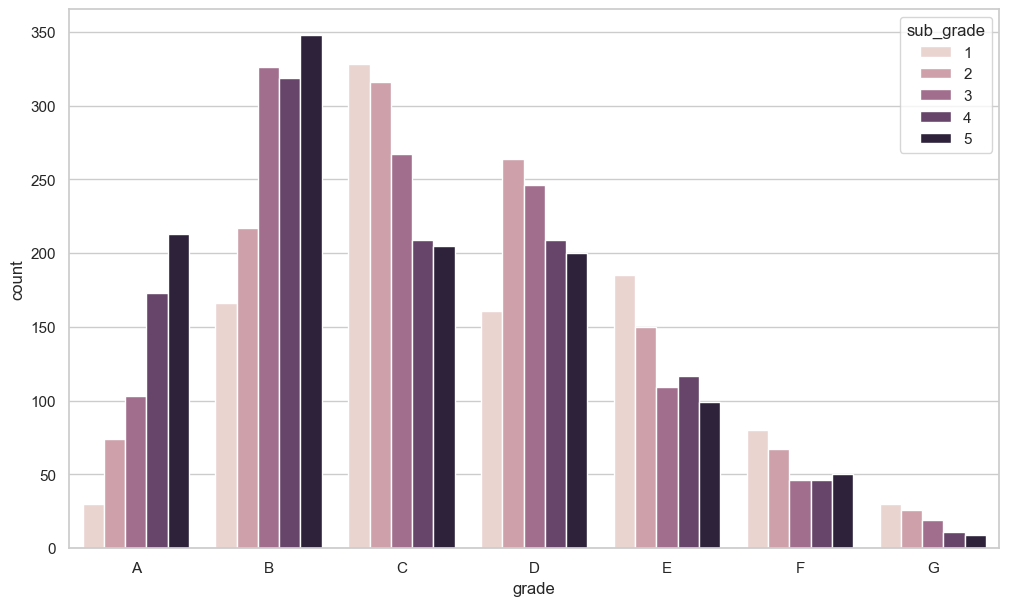

In [36]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_[loan_.loan_status == 1])

#sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

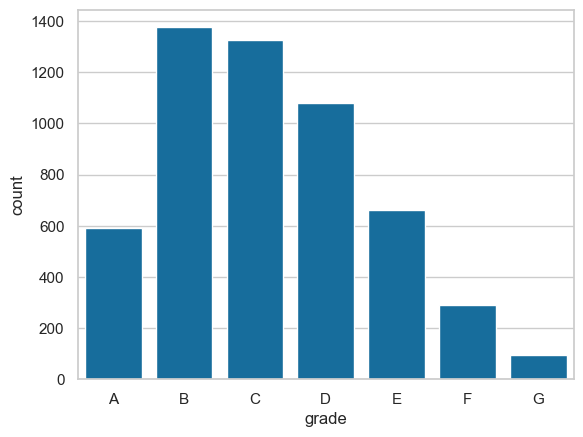

In [37]:
sns.countplot(x = 'grade', data = loan_[loan_.loan_status == 1], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

#### Max is grade B then C who are defaulted on Loans.

Analyzing home ownership

In [38]:
#checking unique values for home_ownership
loan_['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [39]:
loan_['home_ownership'].value_counts()['NONE']

3

In [40]:
#replacing 'NONE' with 'OTHERS'
loan_['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [41]:
loan_['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

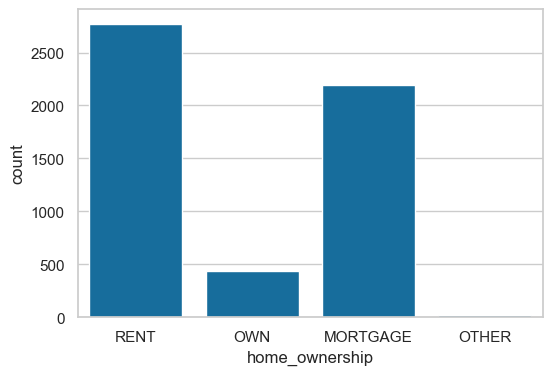

In [42]:
fig, ax = plt.subplots(figsize = (6,4))
#ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_[loan_['loan_status'] == 1])

**Home ownership = Rent are maximum on defaulted loans**

In [43]:
loan_['home_ownership'].value_counts()['OTHER']

96

In [44]:
ax

<Axes: xlabel='home_ownership', ylabel='count'>

<Axes: xlabel='count', ylabel='purpose'>

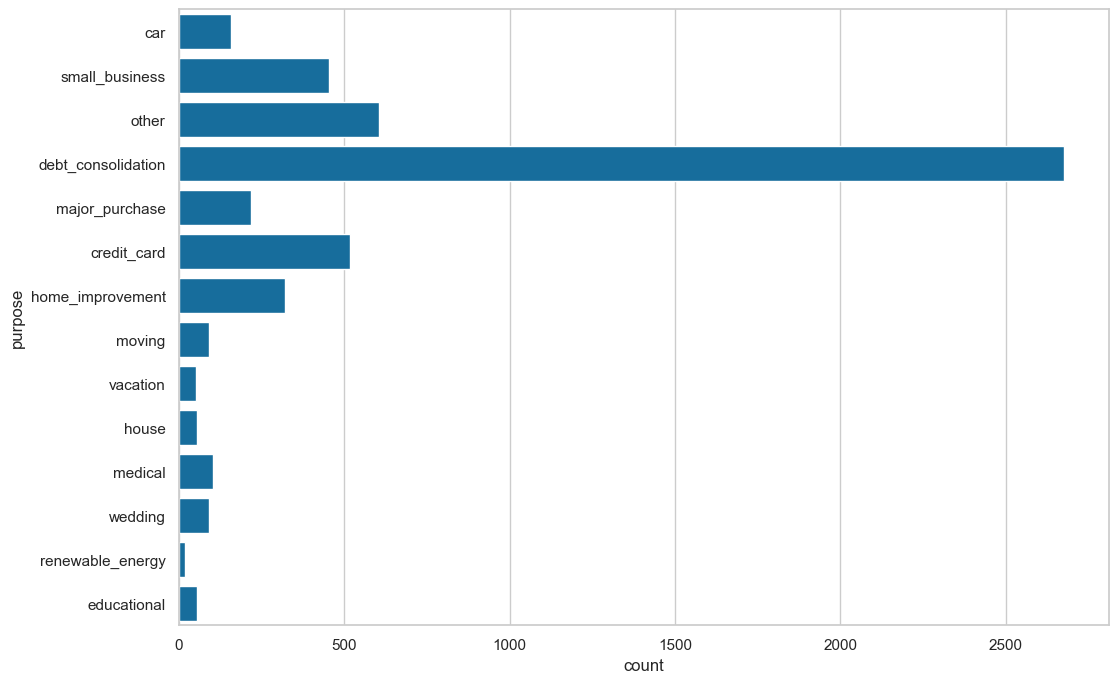

In [45]:
fig, ax = plt.subplots(figsize = (12,8))
#ax.set(xscale = 'log')
sns.countplot(y='purpose', data=loan_[loan_['loan_status'] == 1])

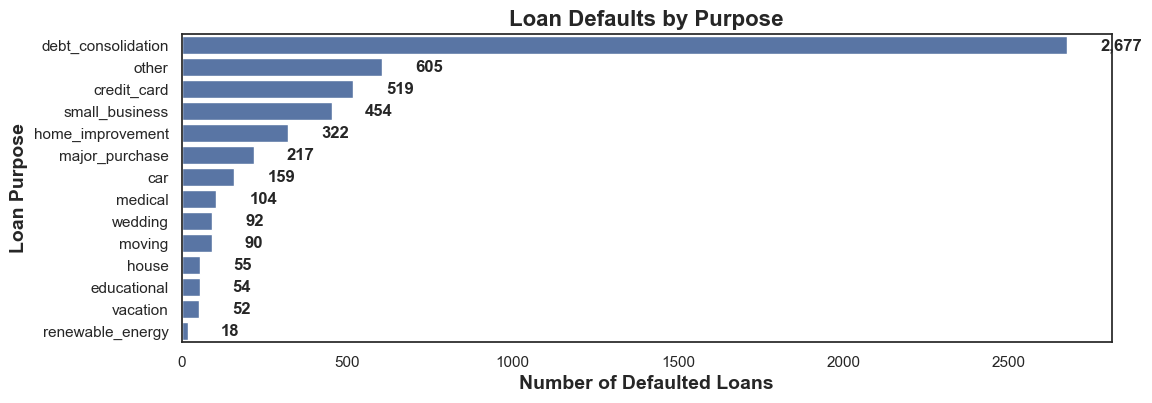

In [106]:
# Count the number of defaults for each loan purpose
loan_purpose_counts = loan_[loan_['loan_status'] == 1]['purpose'].value_counts()

# Create the plot
fig, ax = plt.subplots(figsize=(12,4))  # Adjust figure size for better visibility
sns.set_palette('viridis')  # Use a better color scheme
ax = sns.barplot(y=loan_purpose_counts.index, x=loan_purpose_counts.values)

# Add data labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',  # Format numbers for readability
                (p.get_width() + 100, p.get_y() + p.get_height()/2), 
                ha='left', va='center', fontsize=12, fontweight='bold')

# Labels and title
ax.set_xlabel("Number of Defaulted Loans", fontsize=14, fontweight='bold')
ax.set_ylabel("Loan Purpose", fontsize=14, fontweight='bold')
ax.set_title("Loan Defaults by Purpose", fontsize=16, fontweight='bold')

# Show the plot
plt.show()


#### No. of defaulted loans is maximum for debt_consolidation

In [47]:
print(loan_.columns)

Index(['loan_amnt', 'dti', 'term', 'funded_amnt', 'loan_status',
       'funded_amnt_inv', 'int_rate', 'grade', 'sub_grade', 'annual_inc',
       'purpose', 'verification_status', 'emp_length', 'pymnt_plan', 'issue_d',
       'home_ownership'],
      dtype='object')


In [48]:
#list(loan_.columns)
for index, column in enumerate(loan_.columns, start=1):
    print(index, column)

1 loan_amnt
2 dti
3 term
4 funded_amnt
5 loan_status
6 funded_amnt_inv
7 int_rate
8 grade
9 sub_grade
10 annual_inc
11 purpose
12 verification_status
13 emp_length
14 pymnt_plan
15 issue_d
16 home_ownership


## Univariate Analysis

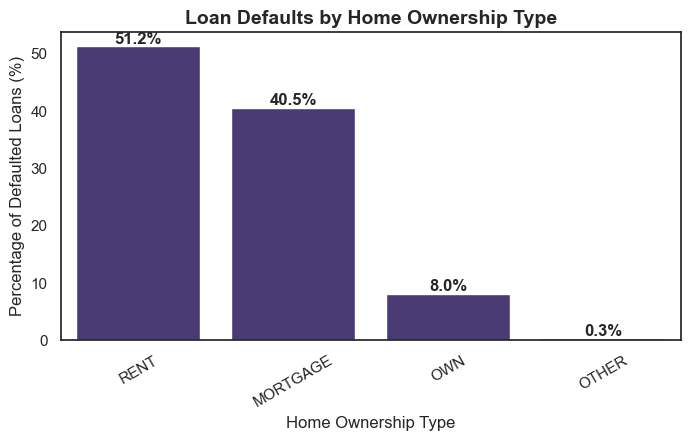

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize counts by calculating percentages
total_loans = len(loan_[loan_['loan_status'] == 1])  # Total defaulted loans
home_ownership_counts = loan_[loan_['loan_status'] == 1]['home_ownership'].value_counts(normalize=True) * 100

# Plot
fig, ax = plt.subplots(figsize=(8,4))  # Bigger figure size for better visibility
sns.set_palette('coolwarm')  # Better color scheme
ax = sns.barplot(x=home_ownership_counts.index, y=home_ownership_counts.values)

# Add percentage labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # Convert to 1 decimal percentage
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labels and title
ax.set_ylabel("Percentage of Defaulted Loans (%)")
ax.set_xlabel("Home Ownership Type")
ax.set_title("Loan Defaults by Home Ownership Type", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Show the plot
plt.show()


In [50]:
loan_.head()

,loan_amnt,dti,term,funded_amnt,loan_status,funded_amnt_inv,int_rate,grade,sub_grade,annual_inc,purpose,verification_status,emp_length,pymnt_plan,issue_d,home_ownership
0,5000,27.65,36 months,5000,0,4975.0,10.65%,B,2,24000.0,credit_card,Verified,10+ years,n,Dec-11,RENT
1,2500,1.00,60 months,2500,1,2500.0,15.27%,C,4,30000.0,car,Source Verified,< 1 year,n,Dec-11,RENT
2,2400,8.72,36 months,2400,0,2400.0,15.96%,C,5,12252.0,small_business,Not Verified,10+ years,n,Dec-11,RENT
3,10000,20.00,36 months,10000,0,10000.0,13.49%,C,1,49200.0,other,Source Verified,10+ years,n,Dec-11,RENT
5,5000,11.20,36 months,5000,0,5000.0,7.90%,A,4,36000.0,wedding,Source Verified,3 years,n,Dec-11,RENT


In [51]:
loan_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36654 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36654 non-null  int64  
 1   dti                  36654 non-null  float64
 2   term                 36654 non-null  object 
 3   funded_amnt          36654 non-null  int64  
 4   loan_status          36654 non-null  int64  
 5   funded_amnt_inv      36654 non-null  float64
 6   int_rate             36654 non-null  object 
 7   grade                36654 non-null  object 
 8   sub_grade            36654 non-null  int64  
 9   annual_inc           36654 non-null  float64
 10  purpose              36654 non-null  object 
 11  verification_status  36654 non-null  object 
 12  emp_length           36654 non-null  object 
 13  pymnt_plan           36654 non-null  object 
 14  issue_d              36654 non-null  object 
 15  home_ownership       36654 non-null  obje

In [52]:
loan_['int_rate'] = loan_['int_rate'].str.rstrip('%').astype(float)

In [53]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_['int_rate_groups'] = pd.cut(loan_['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_['annual_inc_groups'] = pd.cut(loan_['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_['loan_amnt_groups'] = pd.cut(loan_['loan_amnt'], bins=5,precision =0,labels =['1k-6k','6k-14k','14k-22k','22k-30k','30k-35k'])
loan_['dti_groups'] = pd.cut(loan_['dti'], bins=6,precision =0,labels =['0-5','5-10','10-15','15-20','20-25','25-30'])


In [54]:
loan_.loan_amnt.max()

35000

In [55]:
loan_.head()

,loan_amnt,dti,term,funded_amnt,loan_status,funded_amnt_inv,int_rate,grade,sub_grade,annual_inc,purpose,verification_status,emp_length,pymnt_plan,issue_d,home_ownership,int_rate_groups,annual_inc_groups,loan_amnt_groups,dti_groups
0,5000,27.65,36 months,5000,0,4975.0,10.65,B,2,24000.0,credit_card,Verified,10+ years,n,Dec-11,RENT,9%-13%,3k-31k,1k-6k,25-30
1,2500,1.00,60 months,2500,1,2500.0,15.27,C,4,30000.0,car,Source Verified,< 1 year,n,Dec-11,RENT,13%-17%,3k-31k,1k-6k,0-5
2,2400,8.72,36 months,2400,0,2400.0,15.96,C,5,12252.0,small_business,Not Verified,10+ years,n,Dec-11,RENT,13%-17%,3k-31k,1k-6k,5-10
3,10000,20.00,36 months,10000,0,10000.0,13.49,C,1,49200.0,other,Source Verified,10+ years,n,Dec-11,RENT,13%-17%,31k-58k,6k-14k,20-25
5,5000,11.20,36 months,5000,0,5000.0,7.90,A,4,36000.0,wedding,Source Verified,3 years,n,Dec-11,RENT,5%-9%,31k-58k,1k-6k,10-15


In [56]:
loan_.shape

(36654, 20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '< 1 year'),
  Text(1, 0, '4 years'),
  Text(2, 0, '3 years'),
  Text(3, 0, '10+ years'),
  Text(4, 0, '1 year'),
  Text(5, 0, '9 years'),
  Text(6, 0, '2 years'),
  Text(7, 0, '8 years'),
  Text(8, 0, '7 years'),
  Text(9, 0, '5 years'),
  Text(10, 0, '6 years')])

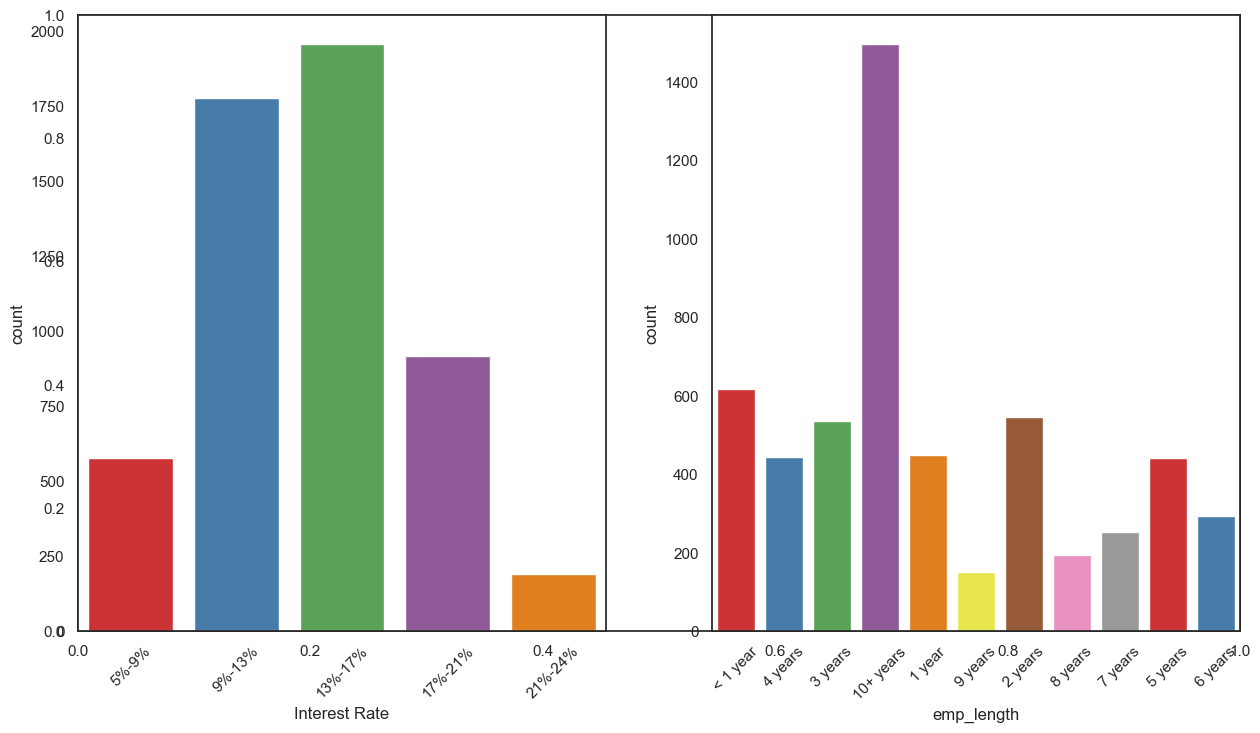

In [57]:
sns.set(style= 'white')
fig, ax = plt.subplots(figsize = (15,8))
plt.subplot(121)
sns.countplot(x='int_rate_groups',palette = 'Set1', data=loan_[loan_.loan_status == 1])
plt.xlabel('Interest Rate')
plt.xticks(rotation=45)
plt.subplot(122)
sns.countplot(x='emp_length', palette = 'Set1', data=loan_[loan_.loan_status == 1])
plt.xticks(rotation=45)

<Axes: xlabel='annual_inc_groups', ylabel='count'>

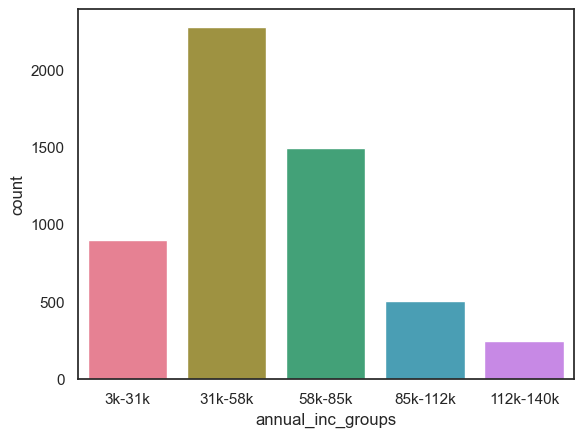

In [58]:
sns.countplot(x='annual_inc_groups', palette = 'husl', data=loan_[loan_.loan_status == 1])

#### No. of defaulted loans is maximum for debt_consolidation
#### Annual_income group 31k-58k ia riskier to give loan

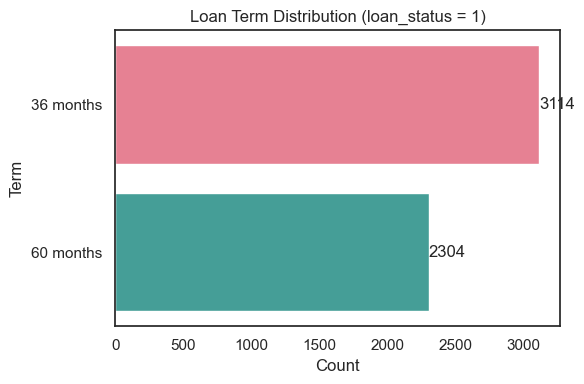

In [103]:
# #sns.countplot(y='term', data=loan_[loan_['loan_status']==1], palette = 'husl')

# Filter data
filtered_data = loan_[loan_['loan_status'] == 1]

# Plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(y='term', data=filtered_data, palette='husl')

# Add raw count labels
for p in ax.patches:
    count = int(p.get_width())
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(x + 1, y, f'{count}', va='center')

# Title and labels
plt.title('Loan Term Distribution (loan_status = 1)')
plt.xlabel('Count')
plt.ylabel('Term')
plt.tight_layout()
plt.show()


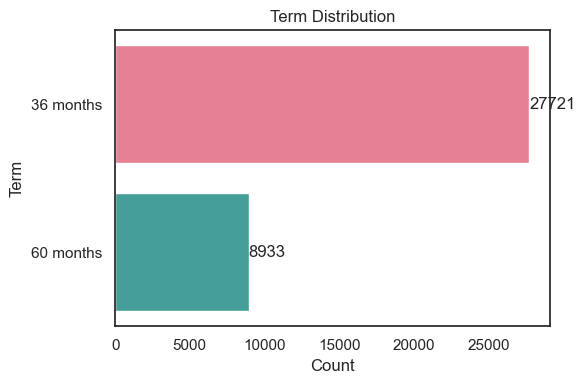

In [109]:
# #sns.countplot(y='term', data=loan_, palette='husl')

plt.figure(figsize=(6, 4))
ax = sns.countplot(y='term', data=loan_, palette='husl')

# Add count labels to each bar
for p in ax.patches:
    count = int(p.get_width())
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(x + 1, y, f'{count}', va='center')

# Titles and labels
plt.title('Term Distribution')
plt.xlabel('Count')
plt.ylabel('Term')
plt.tight_layout()
plt.show()

#### term for 60 months is riskier than 36 months

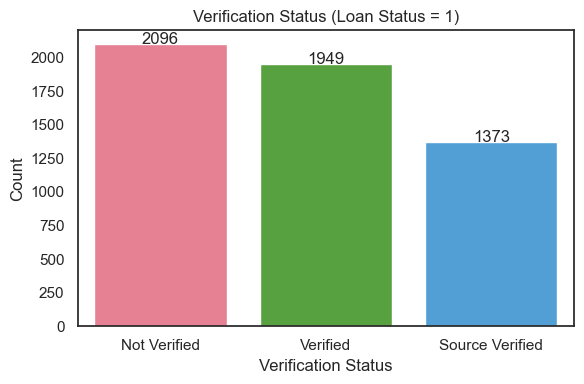

In [112]:
#sns.countplot(x='verification_status', data=loan_[loan_['loan_status']==1], palette = 'husl')
# Filtered data
filtered_data = loan_[loan_['loan_status'] == 1]

# Plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='verification_status', data=filtered_data, palette='husl')

# Add count labels on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{count}', ha='center')

# Titles and labels
plt.title('Verification Status (Loan Status = 1)')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

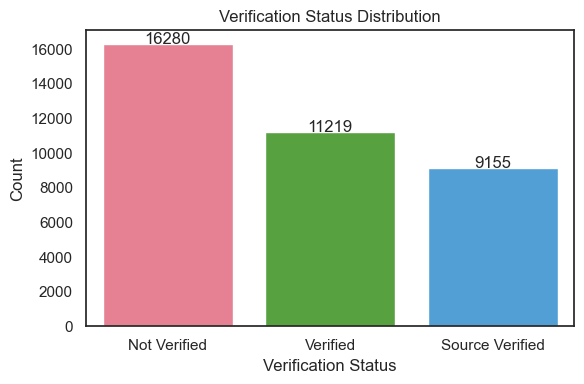

In [113]:
#sns.countplot(x='verification_status', data=loan_, palette = 'husl')
# Plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='verification_status', data=loan_, palette='husl')

# Add count labels on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{count}', ha='center')

# Titles and labels
plt.title('Verification Status Distribution')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### verification_status that is not varified is riskier 

In [61]:
for index, column in enumerate(loan_.columns, start=1):
    print(index, column)

1 loan_amnt
2 dti
3 term
4 funded_amnt
5 loan_status
6 funded_amnt_inv
7 int_rate
8 grade
9 sub_grade
10 annual_inc
11 purpose
12 verification_status
13 emp_length
14 pymnt_plan
15 issue_d
16 home_ownership
17 int_rate_groups
18 annual_inc_groups
19 loan_amnt_groups
20 dti_groups


<Axes: xlabel='loan_amnt_groups', ylabel='count'>

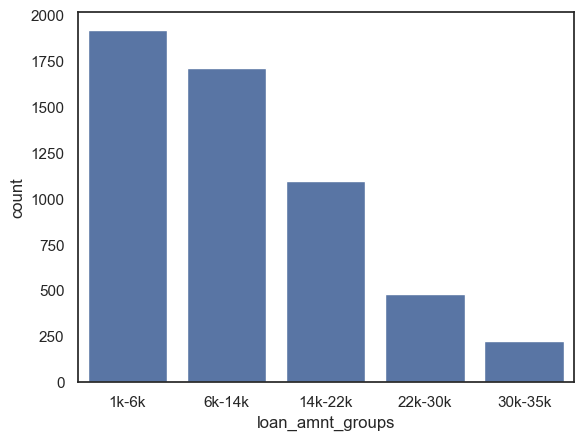

In [62]:
sns.countplot(x='loan_amnt_groups', data=loan_[loan_['loan_status']==1])

#### loans up to 14k are riskier for default

In [63]:
loan_.dti.max()


29.99

<Axes: xlabel='dti_groups', ylabel='count'>

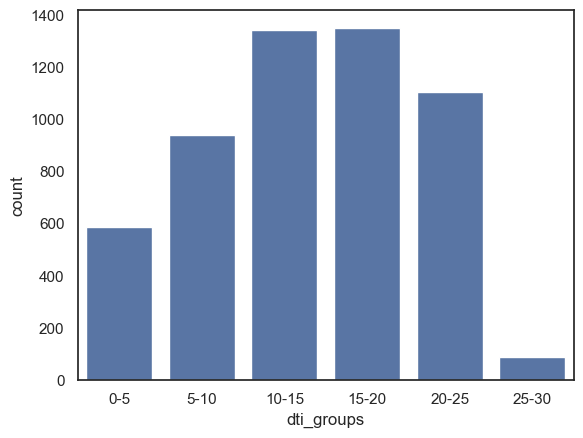

In [64]:
sns.countplot(x='dti_groups', data=loan_[loan_['loan_status']==1])

#### dti 10 to 20 are riskier for default

In [65]:
import pandas as pd

# Sample data for illustration (replace this with your actual DataFrame)
# loan_ = pd.read_csv('your_data.csv')  # Load your data

# Function to convert 'emp_length' to numeric values (years of experience)
def convert_emp_length_to_numeric(emp_length):
    if pd.isnull(emp_length):
        return None  # Return None if the value is NaN
    if '< 1 year' in emp_length:
        return 0  # Treat '< 1 year' as 0 years
    if '10+ years' in emp_length:
        return 10  # Treat '10+ years' as 10 years (or any other appropriate value)
    if 'year' in emp_length:
        # Extract numeric value from the string (e.g., "5 years" -> 5)
        num_years = ''.join([char for char in emp_length if char.isdigit()])
        return int(num_years) if num_years else None
    return None  # Return None if the value does not match any of the conditions

# Apply the conversion function to the 'emp_length' column
loan_['emp_length_numeric'] = loan_['emp_length'].apply(convert_emp_length_to_numeric)

# Show the result to verify the conversion
print(loan_[['emp_length', 'emp_length_numeric']].head())


  emp_length  emp_length_numeric
0  10+ years                  10
1   < 1 year                   0
2  10+ years                  10
3  10+ years                  10
5    3 years                   3


<Axes: xlabel='emp_length_numeric', ylabel='count'>

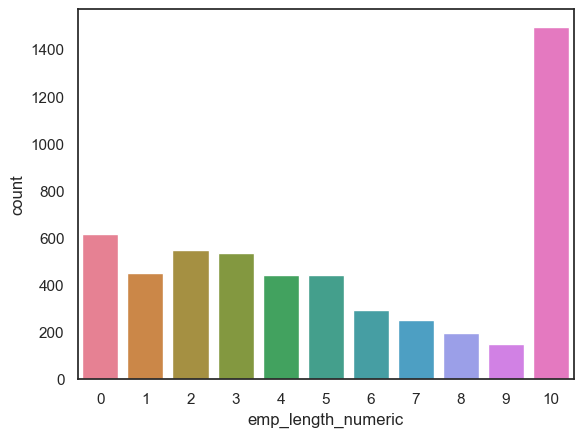

In [66]:
sns.countplot(x='emp_length_numeric', data=loan_[loan_['loan_status']==1], palette = 'husl')

In [67]:
# Function to categorize 'emp_length_numeric' into groups
def categorize_emp_length(emp_length):
    if emp_length <= 3:
        return 'Fresher (0-3 years)'
    elif 4 <= emp_length <= 6:
        return 'Early Career (4-6 years)'
    elif 7 <= emp_length <= 9:
        return 'Mid Career (7-9 years)'
    else:
        return 'Experienced (10+ years)'
    # Now apply the categorization function
loan_['emp_length_group'] = loan_['emp_length_numeric'].apply(categorize_emp_length)

# Show the result to verify the categorization
print(loan_[['emp_length_numeric', 'emp_length_group']].head())

   emp_length_numeric         emp_length_group
0                  10  Experienced (10+ years)
1                   0      Fresher (0-3 years)
2                  10  Experienced (10+ years)
3                  10  Experienced (10+ years)
5                   3      Fresher (0-3 years)


([0, 1, 2, 3],
 [Text(0, 0, 'Fresher (0-3 years)'),
  Text(1, 0, 'Early Career (4-6 years)'),
  Text(2, 0, 'Experienced (10+ years)'),
  Text(3, 0, 'Mid Career (7-9 years)')])

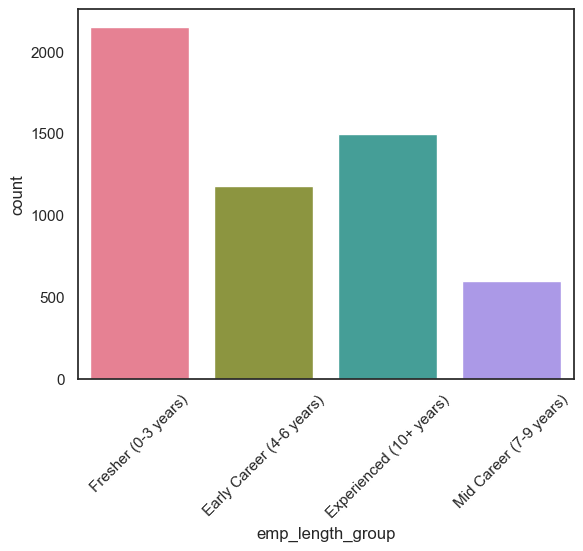

In [68]:
sns.countplot(x='emp_length_group', palette = 'husl', data=loan_[loan_['loan_status']==1])
plt.xticks(rotation=45)

#### emp_length_group for freshers are riskier for default

In [69]:
loan_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36654 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            36654 non-null  int64   
 1   dti                  36654 non-null  float64 
 2   term                 36654 non-null  object  
 3   funded_amnt          36654 non-null  int64   
 4   loan_status          36654 non-null  int64   
 5   funded_amnt_inv      36654 non-null  float64 
 6   int_rate             36654 non-null  float64 
 7   grade                36654 non-null  object  
 8   sub_grade            36654 non-null  int64   
 9   annual_inc           36654 non-null  float64 
 10  purpose              36654 non-null  object  
 11  verification_status  36654 non-null  object  
 12  emp_length           36654 non-null  object  
 13  pymnt_plan           36654 non-null  object  
 14  issue_d              36654 non-null  object  
 15  home_ownership       366

In [70]:
loan_ = loan_.drop('pymnt_plan', axis=1)

##### This graph will show the distribution of the Debt-to-Income ratio (dti) across different loan purposes for loans that defaulted (loan_status == 1).

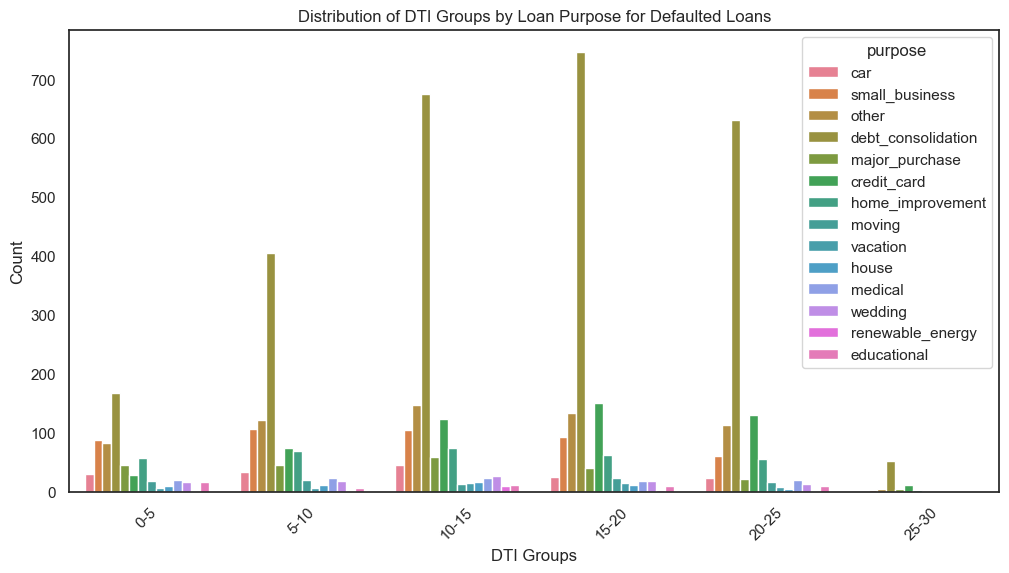

In [71]:
# Step 1: Filter data for loan_status == 1 (defaulted loans)
filtered_data = loan_[loan_['loan_status'] == 1]

# Step 2: Create the countplot for dti_groups and purpose
plt.figure(figsize=(12, 6))
sns.countplot(x='dti_groups', hue='purpose', data=filtered_data)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Title and labels
plt.title('Distribution of DTI Groups by Loan Purpose for Defaulted Loans')
plt.xlabel('DTI Groups')
plt.ylabel('Count')

# Show the plot
plt.show()


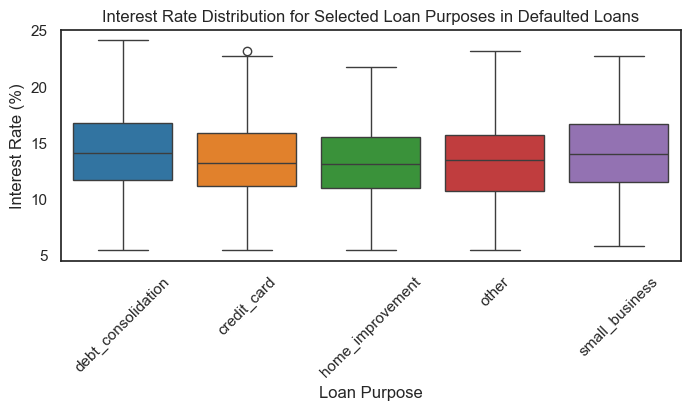

In [115]:
# Step 1: Define the selected 5 loan purposes
selected_purposes = ['small_business', 'other', 'debt_consolidation', 'credit_card', 'home_improvement']

# Step 2: Filter data for only these purposes
filtered_data = filtered_data[filtered_data['purpose'].isin(selected_purposes)]

# Step 3: Create a boxplot for interest rates by selected purposes
plt.figure(figsize=(8, 3))
sns.boxplot(x='purpose', y='int_rate', palette = 'tab10', data=filtered_data)

# Improve readability
plt.xticks(rotation=45)
plt.title('Interest Rate Distribution for Selected Loan Purposes in Defaulted Loans')
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate (%)')

# Show the plot
plt.show()


#### Purpose for interest rate between 11%-17% is more on defaulted loans

In [73]:
loan_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36654 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            36654 non-null  int64   
 1   dti                  36654 non-null  float64 
 2   term                 36654 non-null  object  
 3   funded_amnt          36654 non-null  int64   
 4   loan_status          36654 non-null  int64   
 5   funded_amnt_inv      36654 non-null  float64 
 6   int_rate             36654 non-null  float64 
 7   grade                36654 non-null  object  
 8   sub_grade            36654 non-null  int64   
 9   annual_inc           36654 non-null  float64 
 10  purpose              36654 non-null  object  
 11  verification_status  36654 non-null  object  
 12  emp_length           36654 non-null  object  
 13  issue_d              36654 non-null  object  
 14  home_ownership       36654 non-null  object  
 15  int_rate_groups      366

#### Relation between purpose(top 5) and term

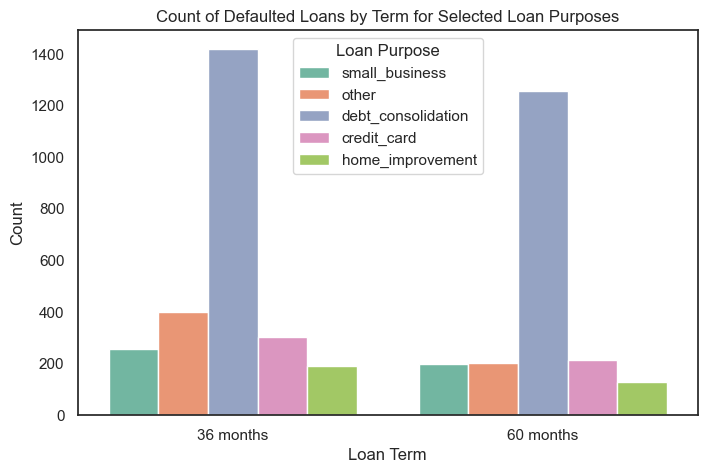

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the selected 5 loan purposes
selected_purposes = ['small_business', 'other', 'debt_consolidation', 'credit_card', 'home_improvement']

# Step 2: Filter data for only these purposes (filtered_data is already for defaulted loans)
filtered_data = filtered_data[filtered_data['purpose'].isin(selected_purposes)]

# Step 3: Create a count plot with term as x-axis and purpose as hue
plt.figure(figsize=(8, 5))
sns.countplot(x='term', hue='purpose', data=filtered_data, order=['36 months', '60 months'], palette='Set2')

# Improve readability
plt.title('Count of Defaulted Loans by Term for Selected Loan Purposes')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.legend(title='Loan Purpose')

# Show the plot
plt.show()


#### Debt consolidation having term of 36 months is more on defaulted loans

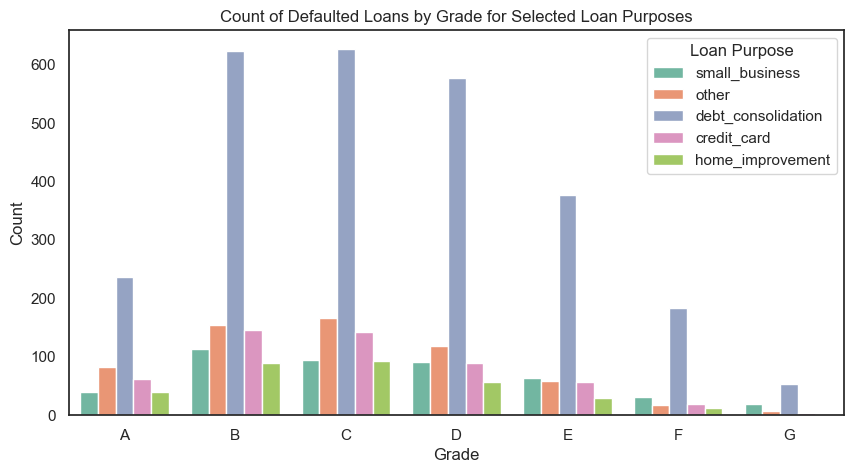

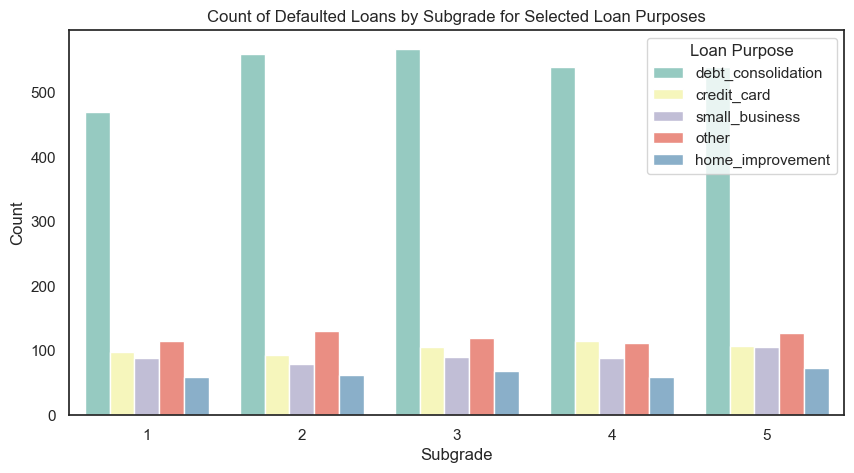

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the selected 5 loan purposes
selected_purposes = ['small_business', 'other', 'debt_consolidation', 'credit_card', 'home_improvement']

# Step 2: Filter data for only these purposes (filtered_data is already for defaulted loans)
filtered_data = filtered_data[filtered_data['purpose'].isin(selected_purposes)]

# Step 3: Create a count plot for Grade vs Purpose
plt.figure(figsize=(10, 5))
sns.countplot(x='grade', hue='purpose', data=filtered_data, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='Set2')

# Improve readability
plt.title('Count of Defaulted Loans by Grade for Selected Loan Purposes')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Purpose')
plt.show()

# Step 4: Create a count plot for Subgrade vs Purpose
plt.figure(figsize=(10, 5))
sns.countplot(x='sub_grade', hue='purpose', data=filtered_data, order=[1, 2, 3, 4, 5], palette='Set3')

# Improve readability
plt.title('Count of Defaulted Loans by Subgrade for Selected Loan Purposes')
plt.xlabel('Subgrade')
plt.ylabel('Count')
plt.legend(title='Loan Purpose')
plt.show()


#### Grade B,C and D is more on defaulted loans

In [76]:
loan_['int_rate_groups'].value_counts()

int_rate_groups
9%-13%     13470
13%-17%    10184
5%-9%       9447
17%-21%     3095
21%-24%      458
Name: count, dtype: int64

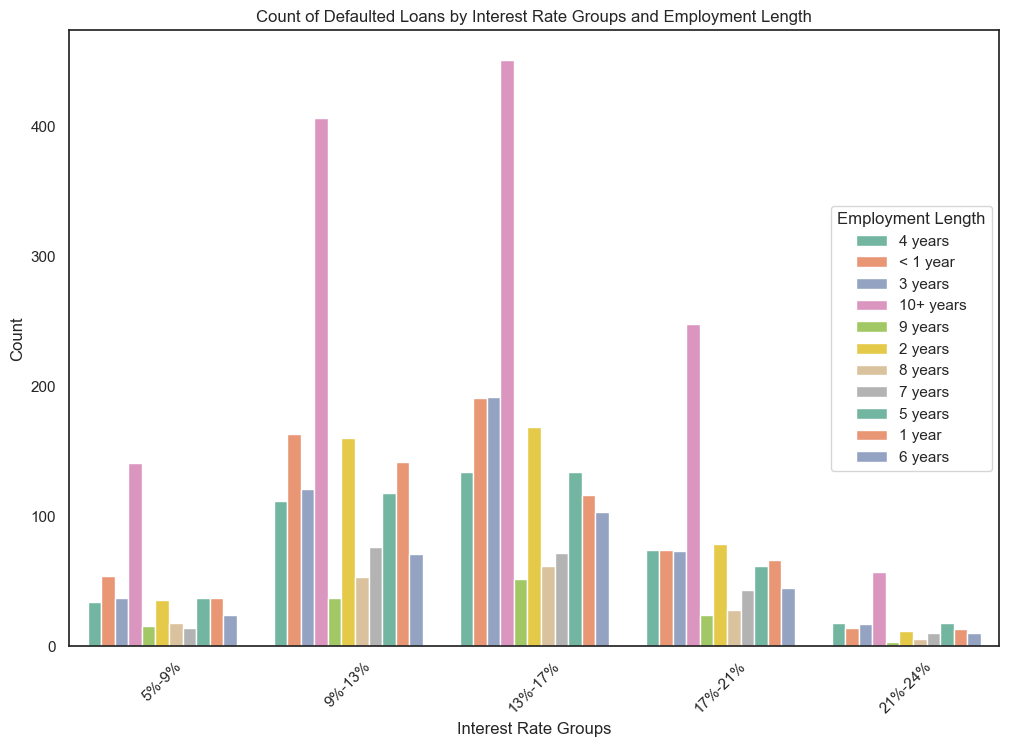

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a count plot with int_rate_groups on x-axis and emp_length as hue
plt.figure(figsize=(12, 8))
sns.countplot(x='int_rate_groups', hue='emp_length', data=filtered_data, palette='Set2')

# Improve readability
plt.xticks(rotation=45)
plt.title('Count of Defaulted Loans by Interest Rate Groups and Employment Length')
plt.xlabel('Interest Rate Groups')
plt.ylabel('Count')
plt.legend(title='Employment Length', loc = 'right')

# Show the plot
plt.show()


In [78]:
# # Step 1: Create the boxplot for 'dti' and 'purpose' (grouped by dti_groups)
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='purpose', y='dti', data=filtered_data)

# # Rotate x-axis labels for better readability if needed
# plt.xticks(rotation=45)

# # Title and labels
# plt.title('Distribution of DTI by Loan Purpose for Defaulted Loans')
# plt.xlabel('Loan Purpose')
# plt.ylabel('Debt-to-Income (DTI)')

# # Show the plot
# plt.showA


#### This graph will show the distribution of the Debt-to-Income ratio (dti) across different loan purposes for loans that defaulted (loan_status == 1).

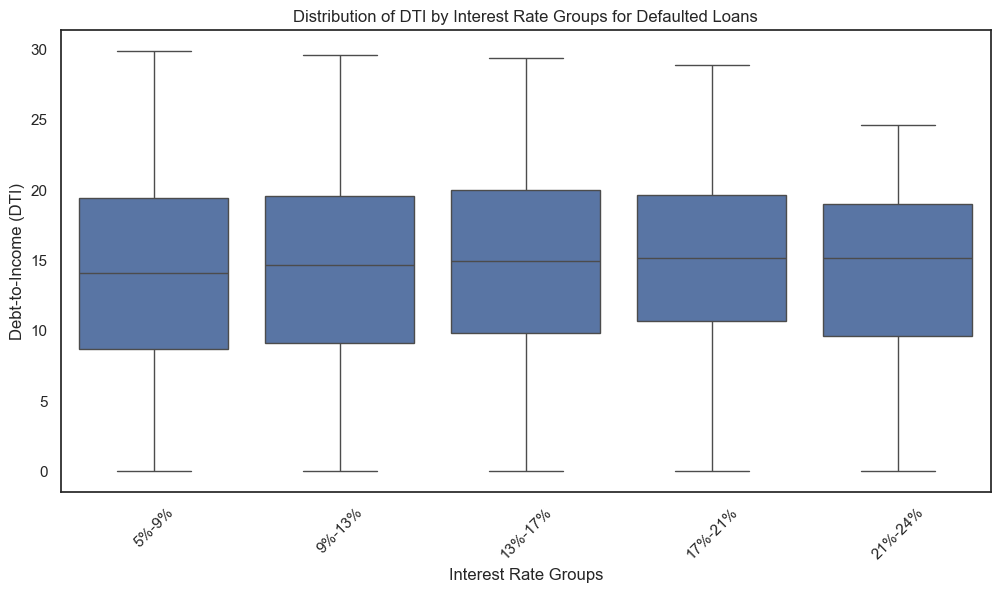

In [79]:
# Step 1: Create the boxplot for 'dti' and 'purpose' (grouped by dti_groups)
plt.figure(figsize=(12, 6))
sns.boxplot(x='int_rate_groups', y='dti', data=filtered_data)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Title and labels
plt.title('Distribution of DTI by Interest Rate Groups for Defaulted Loans')
plt.xlabel('Interest Rate Groups')
plt.ylabel('Debt-to-Income (DTI)')

# Show the plot
plt.show()


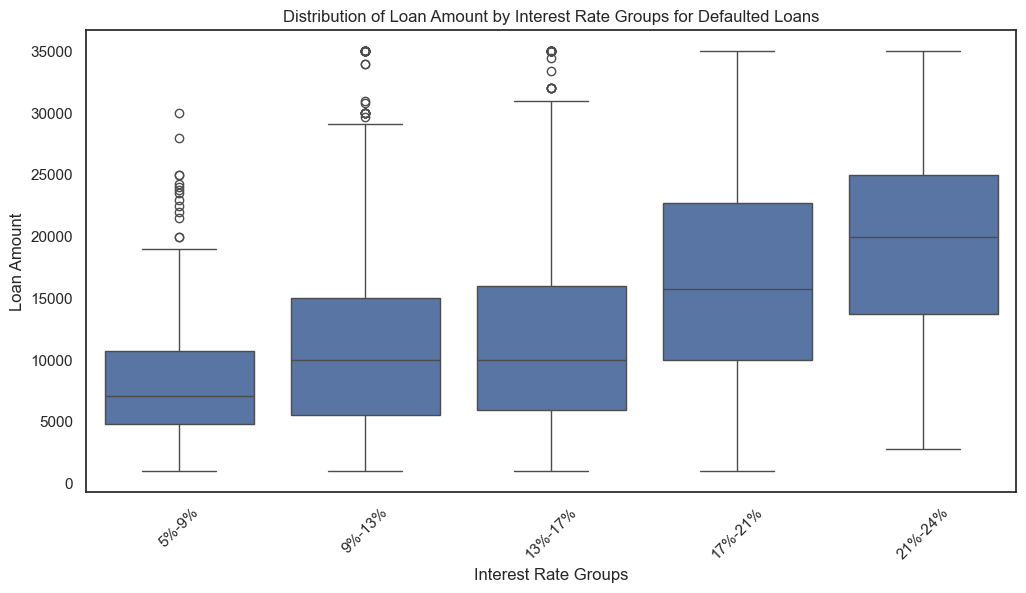

In [80]:
# Step 1: Create the boxplot for 'int_rate_groups' and 'loan_amnt' (grouped by dti_groups)
plt.figure(figsize=(12, 6))
sns.boxplot(x='int_rate_groups', y='loan_amnt', data=filtered_data)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Title and labels
plt.title('Distribution of Loan Amount by Interest Rate Groups for Defaulted Loans')
plt.xlabel('Interest Rate Groups')
plt.ylabel('Loan Amount')

# Show the plot
plt.show()


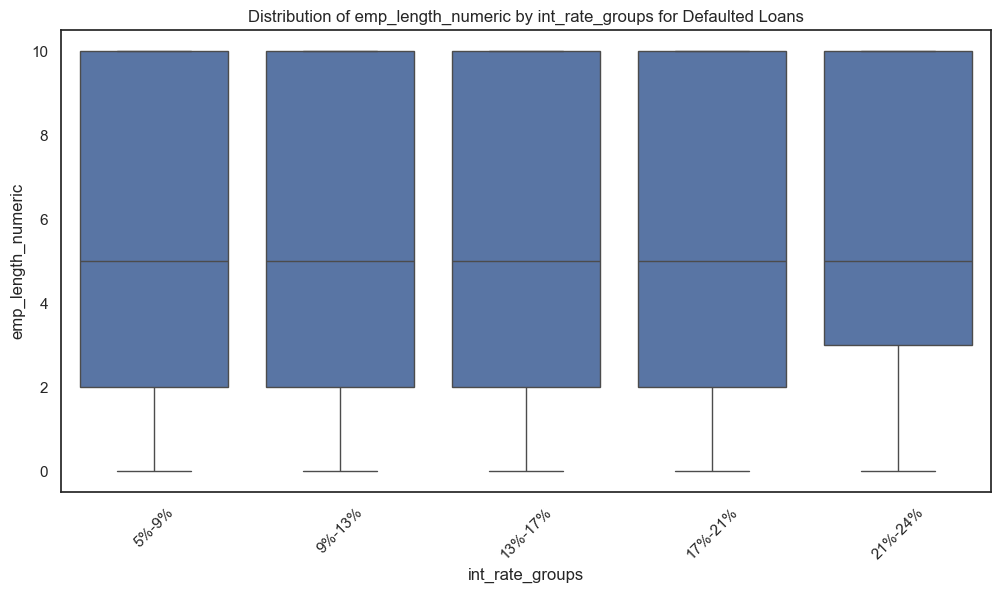

In [81]:
# Step 1: Create the boxplot for 'dti' and 'purpose' (grouped by dti_groups)
plt.figure(figsize=(12, 6))
sns.boxplot(x='int_rate_groups', y='emp_length_numeric', data=filtered_data)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Title and labels
plt.title('Distribution of emp_length_numeric by int_rate_groups for Defaulted Loans')
plt.xlabel('int_rate_groups')
plt.ylabel('emp_length_numeric')

# Show the plot
plt.show()


In [82]:
loan_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36654 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            36654 non-null  int64   
 1   dti                  36654 non-null  float64 
 2   term                 36654 non-null  object  
 3   funded_amnt          36654 non-null  int64   
 4   loan_status          36654 non-null  int64   
 5   funded_amnt_inv      36654 non-null  float64 
 6   int_rate             36654 non-null  float64 
 7   grade                36654 non-null  object  
 8   sub_grade            36654 non-null  int64   
 9   annual_inc           36654 non-null  float64 
 10  purpose              36654 non-null  object  
 11  verification_status  36654 non-null  object  
 12  emp_length           36654 non-null  object  
 13  issue_d              36654 non-null  object  
 14  home_ownership       36654 non-null  object  
 15  int_rate_groups      366

In [83]:
loan_ = loan_.sort_values(by='issue_d', ascending=True)
loan_ = loan_.reset_index(drop=True)

In [84]:
loan_.tail(50)

,loan_amnt,dti,term,funded_amnt,loan_status,funded_amnt_inv,int_rate,grade,sub_grade,annual_inc,...,verification_status,emp_length,issue_d,home_ownership,int_rate_groups,annual_inc_groups,loan_amnt_groups,dti_groups,emp_length_numeric,emp_length_group
36604,4000,8.82,36 months,4000,0,4000.00000,17.58,D,4,40000.0,...,Not Verified,3 years,Sep-11,MORTGAGE,17%-21%,31k-58k,1k-6k,5-10,3,Fresher (0-3 years)
36605,5000,8.99,36 months,5000,0,5000.00000,14.27,C,2,115000.0,...,Source Verified,10+ years,Sep-11,OWN,13%-17%,112k-140k,1k-6k,5-10,10,Experienced (10+ years)
36606,5000,8.36,36 months,5000,0,5000.00000,12.69,B,5,108000.0,...,Not Verified,10+ years,Sep-11,RENT,9%-13%,85k-112k,1k-6k,5-10,10,Experienced (10+ years)
36607,6000,27.83,36 months,6000,0,5950.00000,6.03,A,1,75000.0,...,Verified,1 year,Sep-11,RENT,5%-9%,58k-85k,1k-6k,25-30,1,Fresher (0-3 years)
36608,5000,12.76,36 months,5000,0,5000.00000,7.90,A,4,52000.0,...,Not Verified,9 years,Sep-11,MORTGAGE,5%-9%,31k-58k,1k-6k,10-15,9,Mid Career (7-9 years)
36609,8000,14.40,36 months,8000,0,8000.00000,6.03,A,1,38496.0,...,Not Verified,7 years,Sep-11,MORTGAGE,5%-9%,31k-58k,6k-14k,10-15,7,Mid Career (7-9 years)
36610,2100,13.51,36 months,2100,0,2100.00000,6.62,A,2,61000.0,...,Not Verified,6 years,Sep-11,MORTGAGE,5%-9%,58k-85k,1k-6k,10-15,6,Early Career (4-6 years)
36611,12600,4.15,60 months,12600,1,12525.00000,12.69,B,5,59000.0,...,Verified,4 years,Sep-11,RENT,9%-13%,58k-85k,6k-14k,0-5,4,Early Career (4-6 years)
36612,1300,9.07,36 months,1300,0,1300.00000,9.91,B,1,34400.0,...,Source Verified,< 1 year,Sep-11,RENT,9%-13%,31k-58k,1k-6k,5-10,0,Fresher (0-3 years)
36613,20000,10.86,60 months,20000,0,18425.00000,15.27,C,4,102000.0,...,Verified,10+ years,Sep-11,RENT,13%-17%,85k-112k,14k-22k,10-15,10,Experienced (10+ years)


# Observations:
#### No. of defaulted loans is maximum for debt_consolidation
#### Annual_income group 31k-58k ia riskier to give loan
#### term for 60 months is riskier than 36 months
#### verification_status that is not varified is riskier 
#### loans up to 14k are riskier for default
#### dti 10 to 20 are riskier for default
#### emp_length_group for freshers are riskier for default
#### Purpose for interest rate between 11%-17% is more on defaulted loans
#### Debt consolidation having term of 36 months is more on defaulted loans
#### Grade B,C and D is more on defaulted loans

### Analysing Debt Consolidation with other columns for more insights

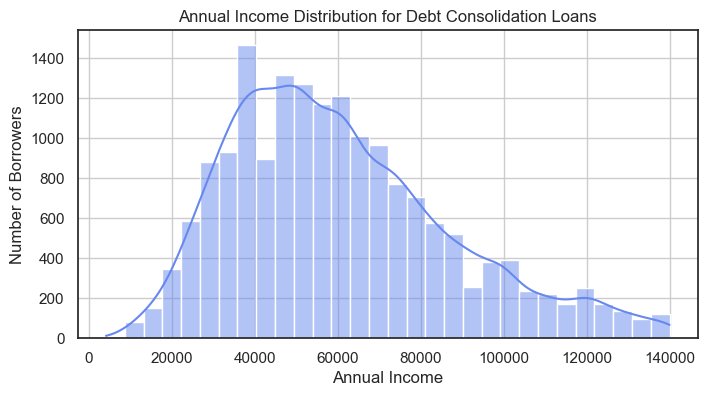

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for "debt_consolidation"
debt_consolidation_data = loan_[loan_['purpose'] == 'debt_consolidation']

# Plot the distribution of annual income for debt consolidation loans
plt.figure(figsize=(8, 4))
sns.histplot(debt_consolidation_data['annual_inc'], bins=30, kde=True)
plt.title('Annual Income Distribution for Debt Consolidation Loans')
plt.xlabel('Annual Income')
plt.ylabel('Number of Borrowers')
plt.grid(True)
plt.show()


#### Debt consolidation having term annual_income group 31k-58k ia riskier to give loan

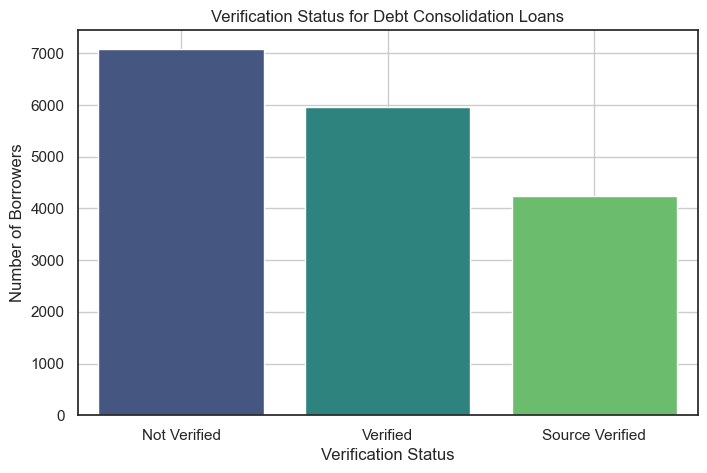

In [86]:
# Filter for debt consolidation loans
debt_df = loan_[loan_['purpose'] == 'debt_consolidation']

# Count the number of loans by verification status within debt consolidation
verification_counts = debt_df['verification_status'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=verification_counts.index, y=verification_counts.values, palette='viridis')

plt.title('Verification Status for Debt Consolidation Loans')
plt.xlabel('Verification Status')
plt.ylabel('Number of Borrowers')
plt.grid(True)
plt.show()


#### Debt consolidation having verification_status that is not varified is riskier 

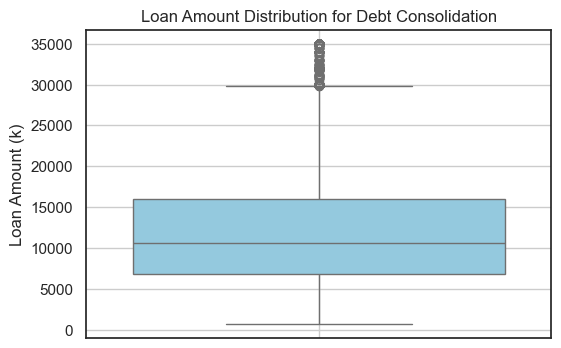

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for debt consolidation loans
debt_df = loan_[loan_['purpose'] == 'debt_consolidation']

# Plot the boxplot of loan amount
plt.figure(figsize=(6, 4))
sns.boxplot(data=debt_df, y='loan_amnt', color='skyblue')

plt.title('Loan Amount Distribution for Debt Consolidation')
plt.ylabel('Loan Amount (k)')
plt.grid(True)
plt.show()


#### Debt consolidation having loan_amnt between 8k to 16k is riskier 

### Analysing annual income with other columns for more insights

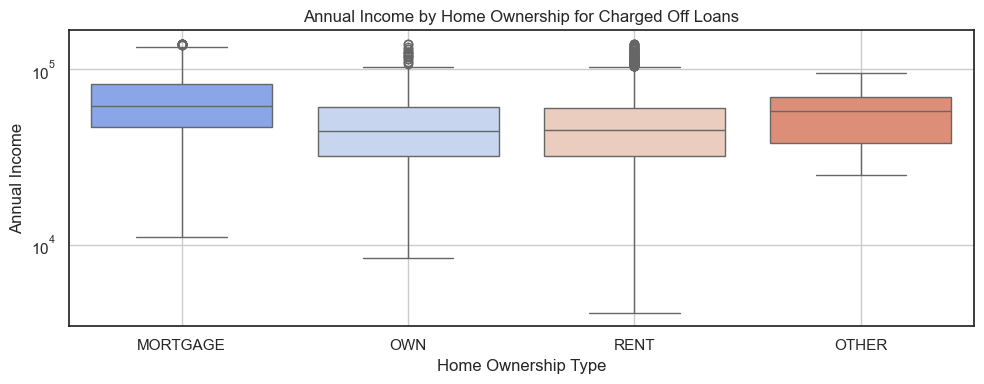

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for charged off loans (assuming '1' indicates Charged Off)
charged_off = loan_[loan_['loan_status'] == 1]

# Plotting
plt.figure(figsize=(10, 4))
sns.boxplot(data=charged_off, x='home_ownership', y='annual_inc', palette='coolwarm')
plt.yscale('log')  # Use log scale if there are large outliers in annual income
plt.title('Annual Income by Home Ownership for Charged Off Loans')
plt.xlabel('Home Ownership Type')
plt.ylabel('Annual Income')
plt.grid(True)
plt.tight_layout()
plt.show()


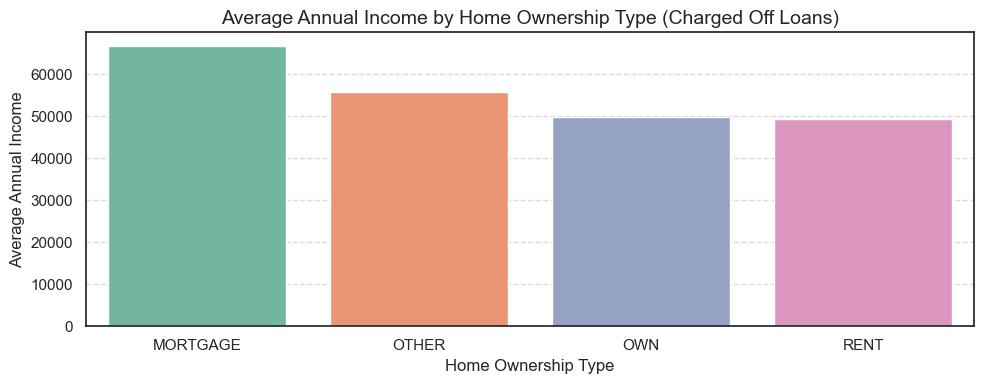

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for charged-off loans (assuming 1 indicates charged off)
charged_off = loan_[loan_['loan_status'] == 1]

# Group by home ownership and calculate average income
avg_income_by_home = charged_off.groupby('home_ownership')['annual_inc'].mean().reset_index()

# Sort values (optional for cleaner plot)
avg_income_by_home = avg_income_by_home.sort_values(by='annual_inc', ascending=False)

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(data=avg_income_by_home, x='home_ownership', y='annual_inc', palette='Set2')

plt.title('Average Annual Income by Home Ownership Type (Charged Off Loans)', fontsize=14)
plt.xlabel('Home Ownership Type', fontsize=12)
plt.ylabel('Average Annual Income', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


- #### Applicants(Charged off) whose home ownership is MORTGAGE and have income of 60-70k. It should be more than 70k.
- #### Applicants(Charged off) whose home ownership is OTHER and have income of 50-55k.It should be more than 60k.
- #### Applicants(Charged off) whose home ownership is OWN and have average annual income of 48k.It should be more than 55k.
- #### Applicants(Charged off) whose home ownership is RENT and have average annual income of 46k. It should be more than 55k.

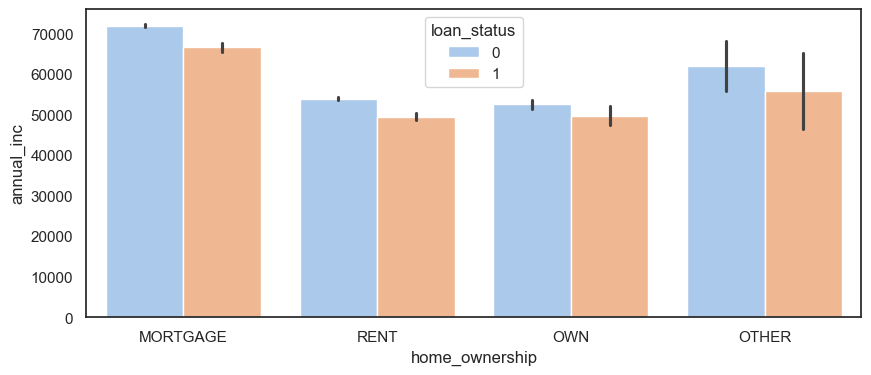

In [90]:
plt.figure(figsize=(10,4))
sns.barplot(data =loan_,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

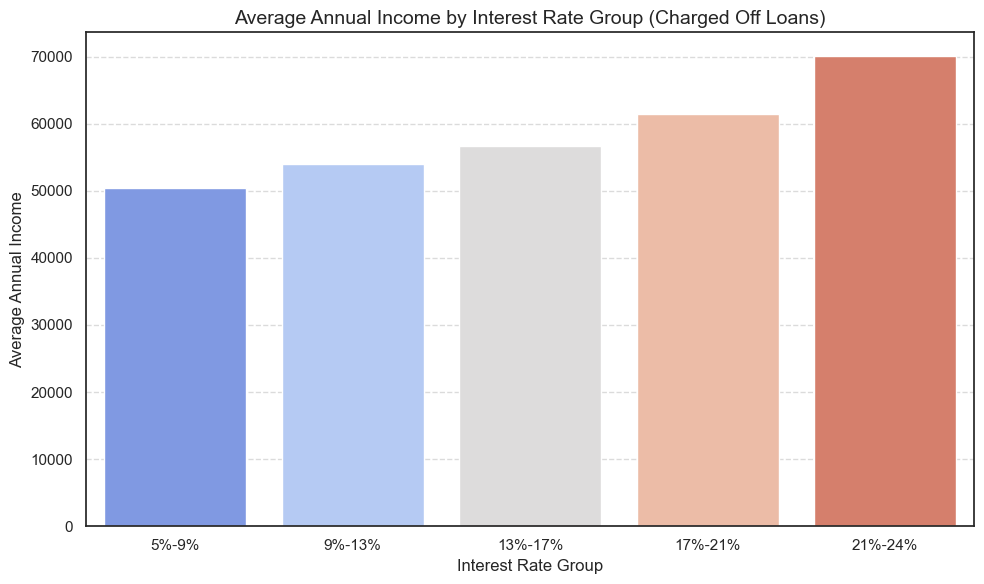

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and calculate average annual income
avg_income_by_int_rate = charged_off.groupby('int_rate_groups')['annual_inc'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_income_by_int_rate, x='int_rate_groups', y='annual_inc', palette='coolwarm')

plt.title('Average Annual Income by Interest Rate Group (Charged Off Loans)', fontsize=14)
plt.xlabel('Interest Rate Group', fontsize=12)
plt.ylabel('Average Annual Income', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


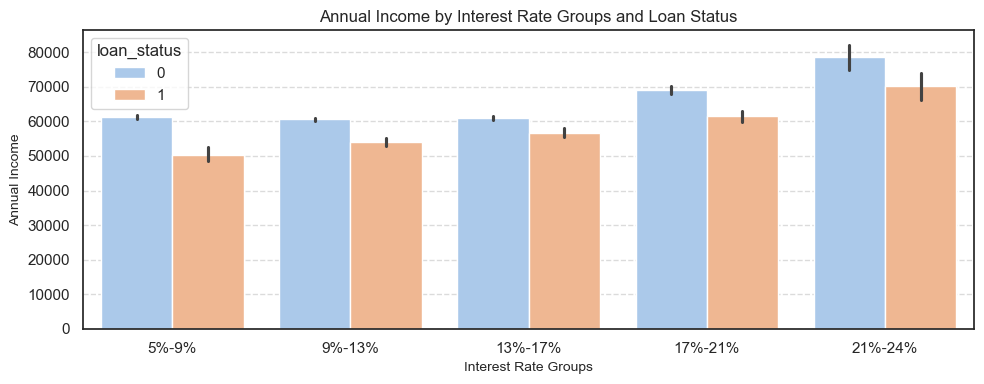

In [92]:
plt.figure(figsize=(10, 4))
sns.barplot(data=loan_, x='int_rate_groups', y='annual_inc', hue='loan_status', palette="pastel")

plt.title('Annual Income by Interest Rate Groups and Loan Status', fontsize=12)
plt.xlabel('Interest Rate Groups', fontsize=10)
plt.ylabel('Annual Income', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Gridlines on y-axis

plt.tight_layout()
plt.show()


#### 👉 For loans with interest rates between 21% and 24%, it’s safer if the average annual income is between 75k and 78k.

#### 👉 In the 17% to 21% interest rate range, keeping the average income around 70k helps lower the risk.

#### 👉 For interest rate groups like 5%-9%, 9%-13%, and 13%-17%, it’s best if the average yearly income is above 60k to stay on the safer side.



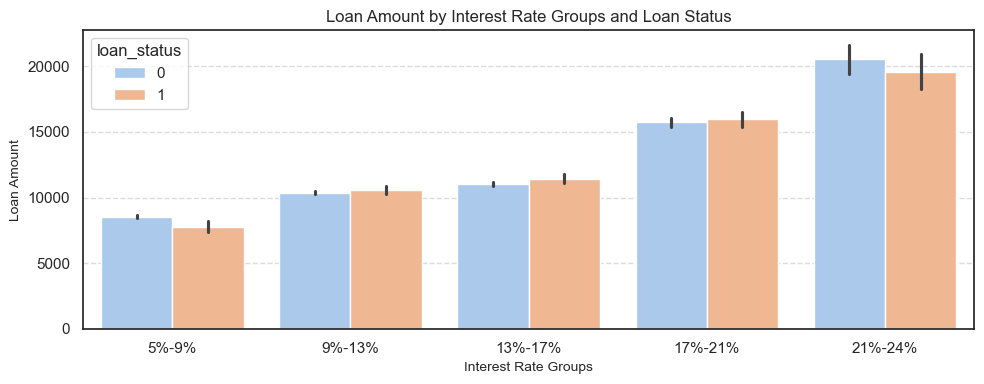

In [105]:
plt.figure(figsize=(10, 4))
sns.barplot(data=loan_, x='int_rate_groups', y='loan_amnt', hue='loan_status', palette="pastel")

plt.title('Loan Amount by Interest Rate Groups and Loan Status', fontsize=12)
plt.xlabel('Interest Rate Groups', fontsize=10)
plt.ylabel('Loan Amount', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Gridlines on y-axis

plt.tight_layout()
plt.show()
